### Introduction

Here, pre determined option policy and sequence of executions are used to determine a baseline score, which will be used to compare out results with rewards after learning different temporal abstracitons

In [1]:
import gymnasium as gym
import matplotlib.pyplot as plt
import random
import numpy as np

from tqdm import tqdm
import random

In [2]:
options_policy_red = np.array([
    [1,3,0,0,0],
    [1,3,0,0,0],
    [1,3,3,3,3],
    [1,1,1,1,1],
    [1,1,1,1,1]
 ])

options_policy_green = np.array([
    [0,0,2,2,1],
    [0,0,2,2,1],
    [2,2,2,1,1],
    [1,2,1,1,1],
    [1,2,1,1,1]
])

options_policy_yellow = np.array([
    [0,3,0,0,0],
    [0,3,0,0,0],
    [0,3,3,3,3],
    [0,1,1,1,3],
    [0,1,3,1,3]
])

options_policy_blue = np.array([
    [0,0,0,0,3],
    [0,0,0,0,3],
    [2,2,2,0,3],
    [1,1,1,0,3],
    [1,1,1,0,3]
])

deterministice_options_policies = [options_policy_red, options_policy_green, options_policy_yellow, options_policy_blue]

In [3]:
env = gym.make('Taxi-v3', render_mode="rgb_array")

In [4]:
#### SMDP Q-Learning

# Add parameters you might need here
gamma = 0.9
alpha = 0.1  # You can adjust this value based on your problem and convergence rate
rewards_history = []

# Iterate over 1000 episodes
for _ in tqdm(range(1000)):
    state = env.reset()[0]
    done = False
    episode_reward = 0

    # While episode is not over
    while not done:
        x, y, passenger_loc, drop_loc = env.decode(state)

        # Go to the passenger
        find_passenger = False
        while not find_passenger and not done:
            action = deterministice_options_policies[passenger_loc][x, y]
            state, reward, done, truc, info = env.step(action)
            episode_reward += reward
            x, y, passenger_loc, drop_loc = env.decode(state)
            if (x, y) == env.unwrapped.locs[passenger_loc]:
                find_passenger = True

        # Pick up the passenger
        action = 4
        state, reward, done, truc, info = env.step(action)
        episode_reward += reward

        # Move to the drop location
        reach_drop_pont = False
        while not reach_drop_pont and not done:
            action = deterministice_options_policies[drop_loc][x, y]
            state, reward, done, truc, info = env.step(action)
            episode_reward += reward
            x, y, passenger_loc, drop_loc = env.decode(state)
            if (x, y) == env.unwrapped.locs[drop_loc]:
                reach_drop_pont = True
        
        # Drop off the passenger
        action = 5
        state, reward, done, truc, info = env.step(action)
        episode_reward += reward
        
    rewards_history.append(episode_reward)

  0%|                                                                                                                 | 0/1000 [00:00<?, ?it/s]

/Users/arjunramesh/.local/share/virtualenvs/RL_2024_PA_3-5EEPQmDE/lib/python3.11/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.decode to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.decode` for environment variables or `env.get_wrapper_attr('decode')` that will search the reminding wrappers.
  logger.warn(
100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 5676.36it/s]


In [5]:
from algorithms import plot_average_reward

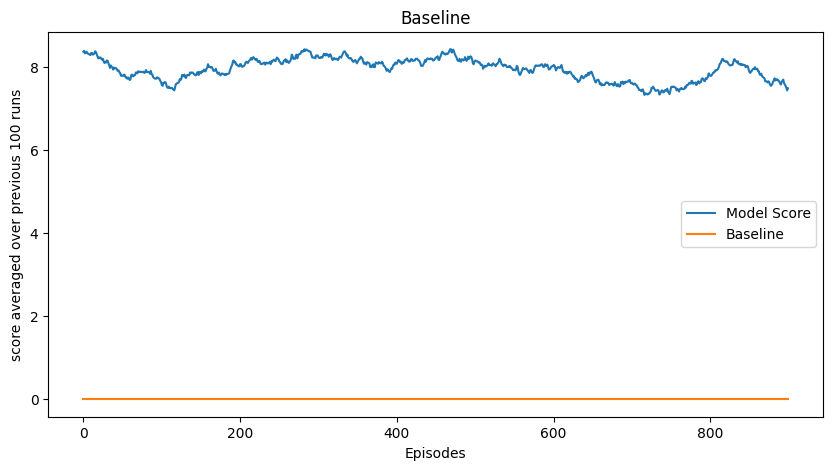

In [6]:
plot_average_reward(rewards_history, title="Baseline")

In [7]:
print(np.average(rewards_history))

7.932


We will be using the baseline score of 8 for the rest of the experiments